In [9]:
bucket=100

metrics=['tc','sp','col','len','homo','whomo','whomo2','ngap','ngap2']



### The code starts here ###

In [73]:
import numpy
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import seaborn as sns

In [114]:
def foldercsv2pds(folder,metrics):
    ''' Transform all the csv in a folder (given by the metrics) to panda dataframes.'''
    
    import pandas as pd 
    
    dfs={} 
    # Create Data frames
    for metric in metrics:
        fil=folder+"/"+metric+".csv"
        dfs[metric]=pd.read_csv(fil,header=[0,1],index_col=0).drop("nseq",axis=1,level=1)
        
    # nseq
    nseq=list(csv2nseq(folder,metrics[0]))
    tmp=pd.read_csv(fil,header=[0,1],index_col=0).drop("nseq",axis=1,level=1)
    for i in tmp.columns:
        tmp[i]=nseq
    dfs["nseq"]=tmp
        
    return(dfs)

In [115]:
def csv2nseq(folder,metric):
    import pandas as pd
    fil=folder+"/"+metric+".csv"
    df=pd.read_csv(fil,header=[0,1],index_col=0)
    nseq=df["nseq"].values.flatten()
    return(nseq)

In [129]:
def dfs2df(dfs):
    tmp={}
    for metric,df in dfs.items():
        tmp[metric]=list(df.values.flatten())
    df=pd.DataFrame(tmp)
    return(df)

In [136]:
# Read raw csv to Data Frames
folder="/users/cn/sjin/projects/homoplasy/nf_homoplasty/data/raw/bucket"+str(bucket)
raw=foldercsv2pds(folder,metrics)
nseq=csv2nseq(folder,"tc")

# Merge dfs to df
df=dfs2df(raw)

### Analysis ###

Raw data analysis.

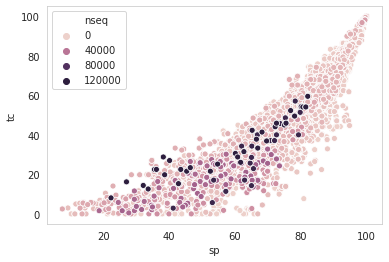

In [144]:
sns.scatterplot(x="sp",y="tc",hue="nseq",palette=cmap,data=df)

In [ ]:
# Tc vs homo
x=raw["homo"].values.flatten()
y=raw["tc"].values.flatten()
plt.scatter(x,y)
plt.xlabel("homo",fontsize=14)
plt.ylabel("tc",fontsize=14)
plt.show()

In [50]:
families=raw["tc"].index.tolist()
colors = pd.tools.plotting._get_standard_colors(len(families), color_type='random')

AttributeError: module 'pandas' has no attribute 'tools'

### Summary ###

Mean value for each aligner_tree and metric.

In [10]:
# Get list of aligners & trees
header=[]
aligners=[]
trees=[]
for i in raw["tc"].columns:
    header.append(i)
    aligner=i[0]
    tree=i[1]
    if aligner not in aligners:
        aligners.append(aligner)
    if tree not in trees:
        trees.append(tree)

In [154]:
### Only run if you want to save csv & xlsx files

def pd2files(metrics,aligners,trees,raw,bucket):
    
    outcsv="/users/cn/sjin/projects/homoplasy/nf_homoplasty/data/summary/summary.bucket"+str(bucket)+".csv"
    outxslx="/users/cn/sjin/projects/homoplasy/nf_homoplasty/excels/summary/summary.bucket"+str(bucket)+".xlsx"
    
    # Create summary pd
    index=["aligner","tree"]+metrics
    l=[index]
    for aligner in aligners:
        for tree in trees:
            tmp=[aligner,tree]
            for metric in metrics:
                tmp.append(round(raw[metric][aligner][tree].mean(),2))
            l.append(tmp)
    #l=map(list, zip(*l))
    sumpd=pd.DataFrame(l)

    # Save csv & xlsx
    sumpd.to_csv(outcsv,header=False,index=False)
    sumpd.to_excel(outxslx,header=False,index=False)
    
#pdb2files(metrics,aligners,trees,raw,bucket)


In [11]:
# Create summary pd with index & column names
index = pd.MultiIndex.from_tuples(header, names=['aligner', 'tree'])
head=metrics
l=[]
for aligner in aligners:
    for tree in trees:
        tmp=[]
        for metric in metrics:
            tmp.append(round(raw[metric][aligner][tree].mean(),2))
        l.append(tmp)
sumpd=pd.DataFrame(l,index=index,columns=head)

In [12]:
sumpd.head()

tc     sp    col      len    homo    whomo  \
aligner  tree                                                                
CLUSTALO codnd               57.14  79.86  61.54  2754.68  336.68  1340.43   
         dpparttreednd1      50.50  75.57  54.54  2578.84  323.55  1291.97   
         dpparttreednd2      50.50  75.57  54.54  2578.84  323.55  1291.97   
         dpparttreednd2size  53.23  78.21  57.87  2193.53  265.91  1008.86   
         fastaparttreednd    51.01  75.38  54.64  2650.27  341.49  1346.30   

                              whomo2         ngap         ngap2  
aligner  tree                                                    
CLUSTALO codnd               6038.12  42751113.57  1.445462e+09  
         dpparttreednd1      6538.27  41331132.88  1.637150e+09  
         dpparttreednd2      6538.27  41331132.88  1.637150e+09  
         dpparttreednd2size  4928.60  32105784.97  1.667986e+09  
         fastaparttreednd    7055.35  41630679.67  1.412954e+09

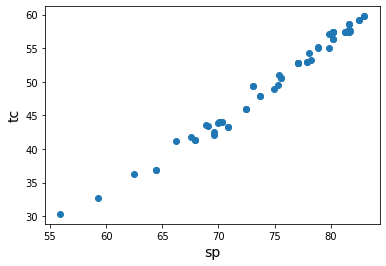

In [20]:
plt.scatter(sumpd.sp,sumpd.tc,)
plt.xlabel("sp",fontsize=14)
plt.ylabel("tc",fontsize=14)
plt.show()